# Customer Churn Analysis


Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Customer Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# EDA 

<AxesSubplot:xlabel='gender', ylabel='count'>

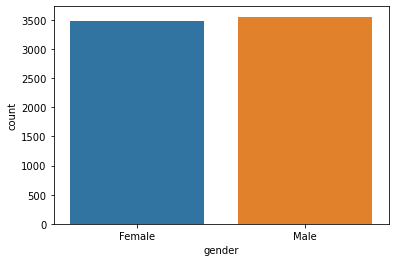

In [6]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

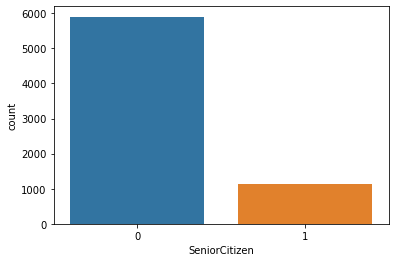

In [7]:
sns.countplot(df['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='count'>

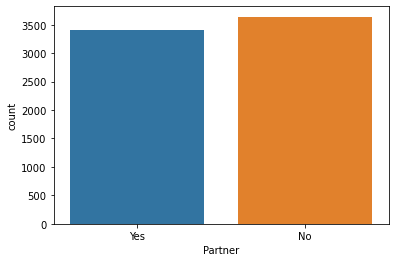

In [8]:
sns.countplot(df['Partner'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

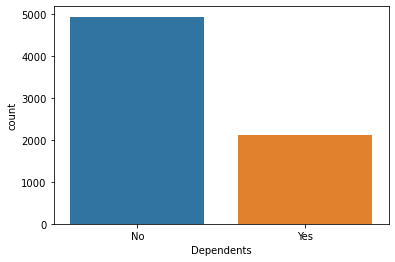

In [9]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

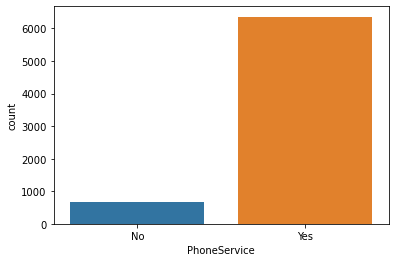

In [10]:
sns.countplot(df['PhoneService'])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

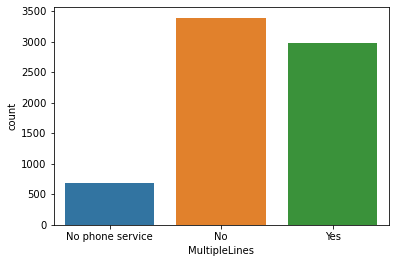

In [11]:
sns.countplot(df['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

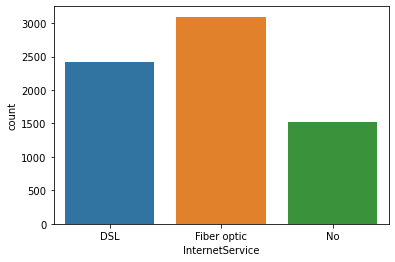

In [12]:
sns.countplot(df['InternetService'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

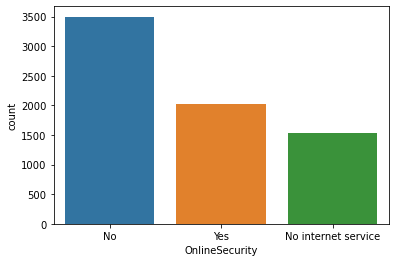

In [13]:
sns.countplot(df['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

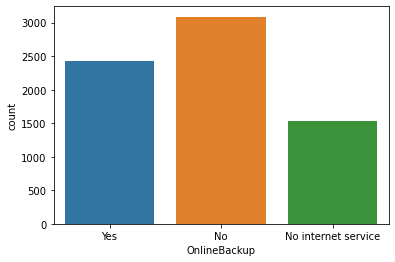

In [14]:
sns.countplot(df['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

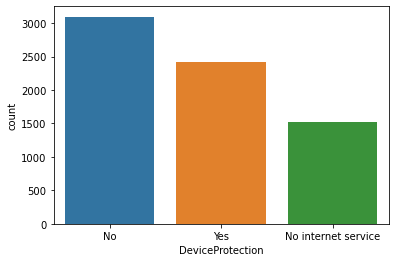

In [15]:
sns.countplot(df['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

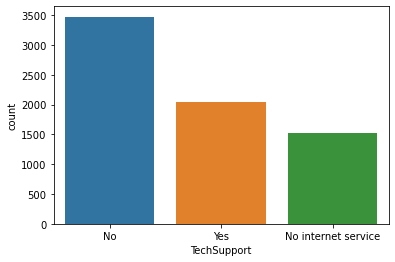

In [16]:
sns.countplot(df['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

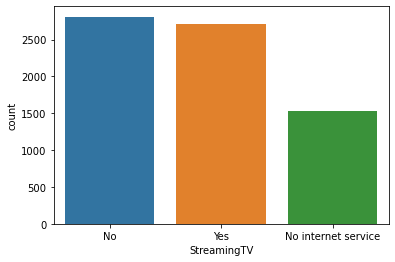

In [17]:
sns.countplot(df['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

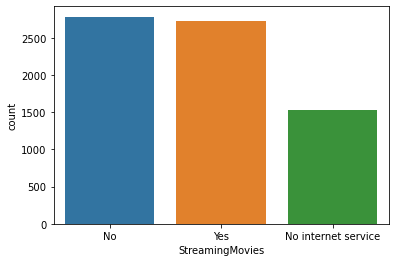

In [18]:
sns.countplot(df['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

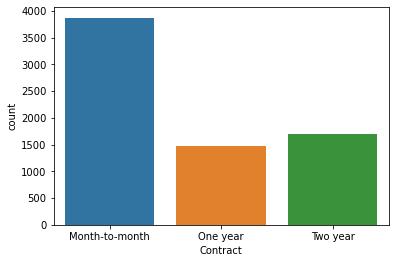

In [19]:
sns.countplot(df['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

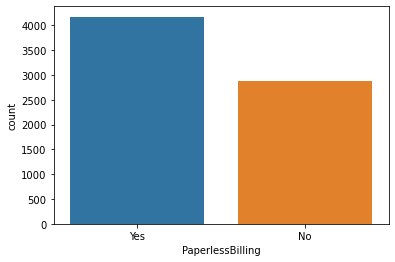

In [20]:
sns.countplot(df['PaperlessBilling'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

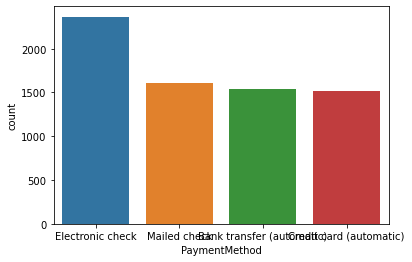

In [21]:
sns.countplot(df['PaymentMethod'])

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

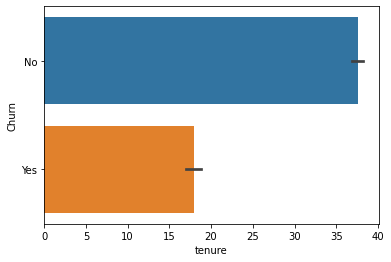

In [22]:
sns.barplot(data = df, x = 'tenure', y = 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

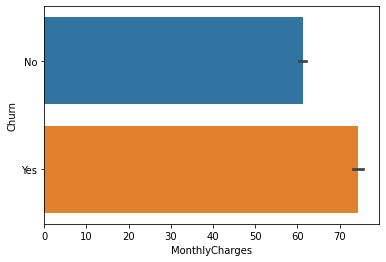

In [23]:
sns.barplot(data = df, x = 'MonthlyCharges', y = 'Churn')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

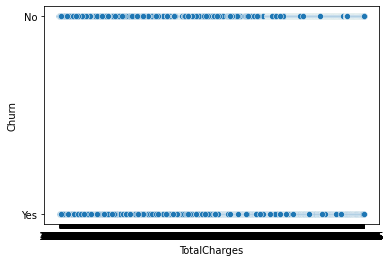

In [24]:
sns.scatterplot(data = df, x = 'TotalCharges', y = 'Churn')

In [25]:
#Removing blank space with Nan in TotalCharges (488th) row
df = df.mask(df == '')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

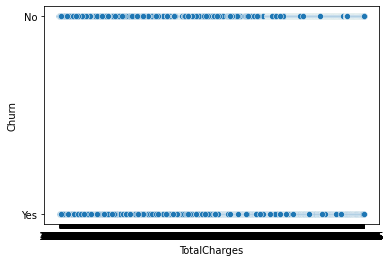

In [26]:
sns.scatterplot(data = df, x = 'TotalCharges', y = 'Churn')

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [28]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Correlation

In [29]:
df.corr().sum()

customerID          0.941780
gender              0.932823
SeniorCitizen       1.087378
Partner             2.986013
Dependents          1.752401
tenure              4.248620
PhoneService        1.860509
MultipleLines       2.785495
InternetService     1.179403
OnlineSecurity      2.037209
OnlineBackup        2.795358
DeviceProtection    3.224996
TechSupport         2.425003
StreamingTV         3.590931
StreamingMovies     3.556161
Contract            3.438984
PaperlessBilling    1.320814
PaymentMethod      -0.792109
MonthlyCharges      3.555220
TotalCharges        2.410152
Churn              -0.459736
dtype: float64

<AxesSubplot:>

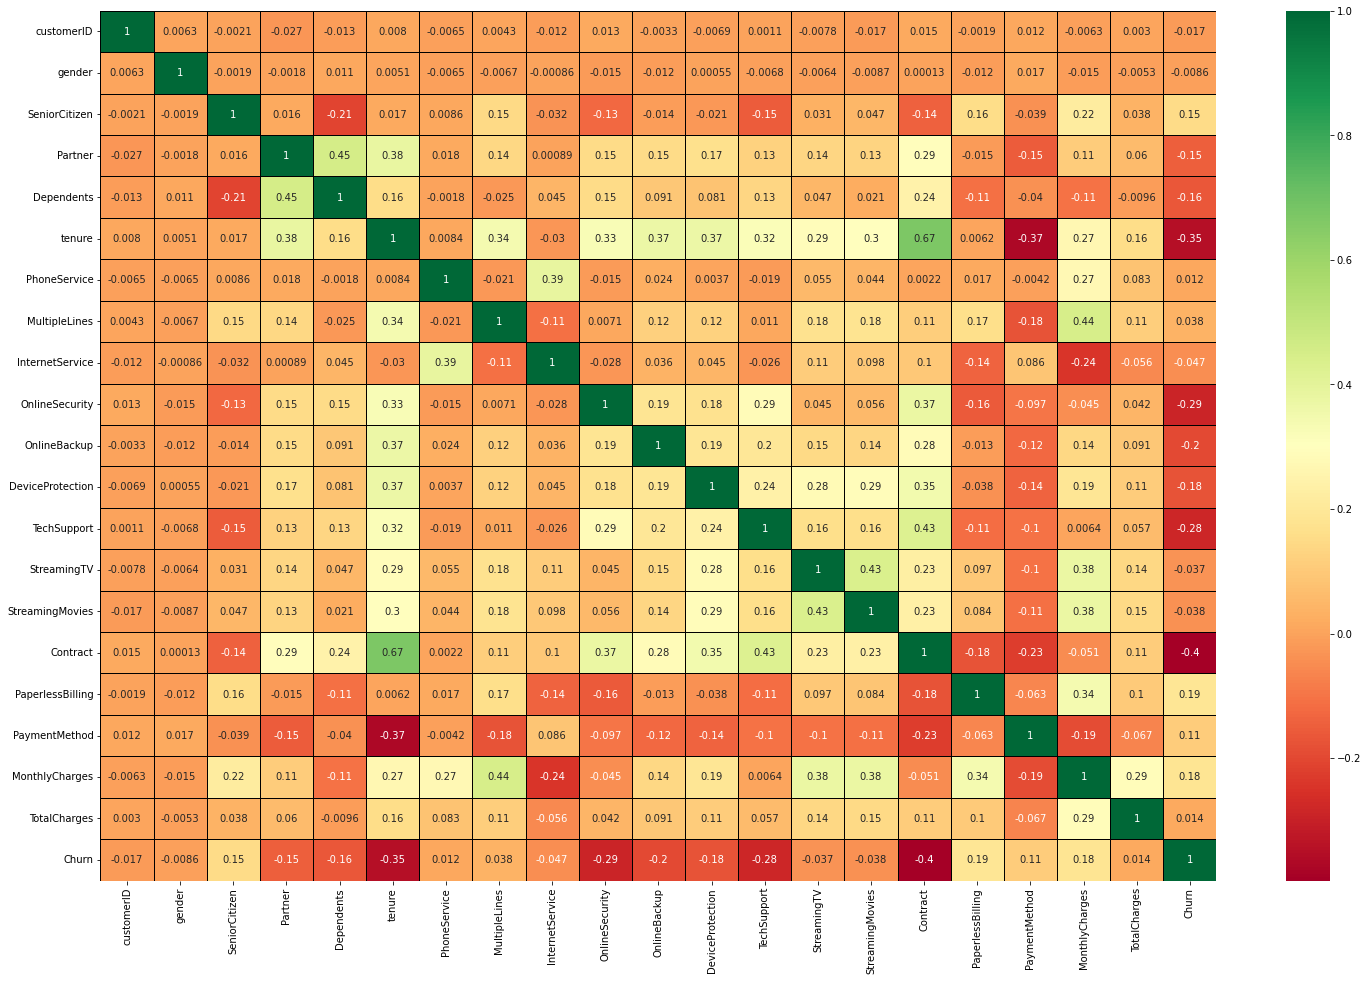

In [30]:
plt.figure(figsize=(25,16))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', cmap = 'RdYlGn')

customerID             AxesSubplot(0.125,0.657941;0.0945122x0.222059)
gender              AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
SeniorCitizen       AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Partner             AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Dependents          AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
tenure              AxesSubplot(0.692073,0.657941;0.0945122x0.222059)
PhoneService        AxesSubplot(0.805488,0.657941;0.0945122x0.222059)
MultipleLines          AxesSubplot(0.125,0.391471;0.0945122x0.222059)
InternetService     AxesSubplot(0.238415,0.391471;0.0945122x0.222059)
OnlineSecurity      AxesSubplot(0.351829,0.391471;0.0945122x0.222059)
OnlineBackup        AxesSubplot(0.465244,0.391471;0.0945122x0.222059)
DeviceProtection    AxesSubplot(0.578659,0.391471;0.0945122x0.222059)
TechSupport         AxesSubplot(0.692073,0.391471;0.0945122x0.222059)
StreamingTV         AxesSubplot(0.805488,0.391471;0.0945122x0.222059)
StreamingMovies     

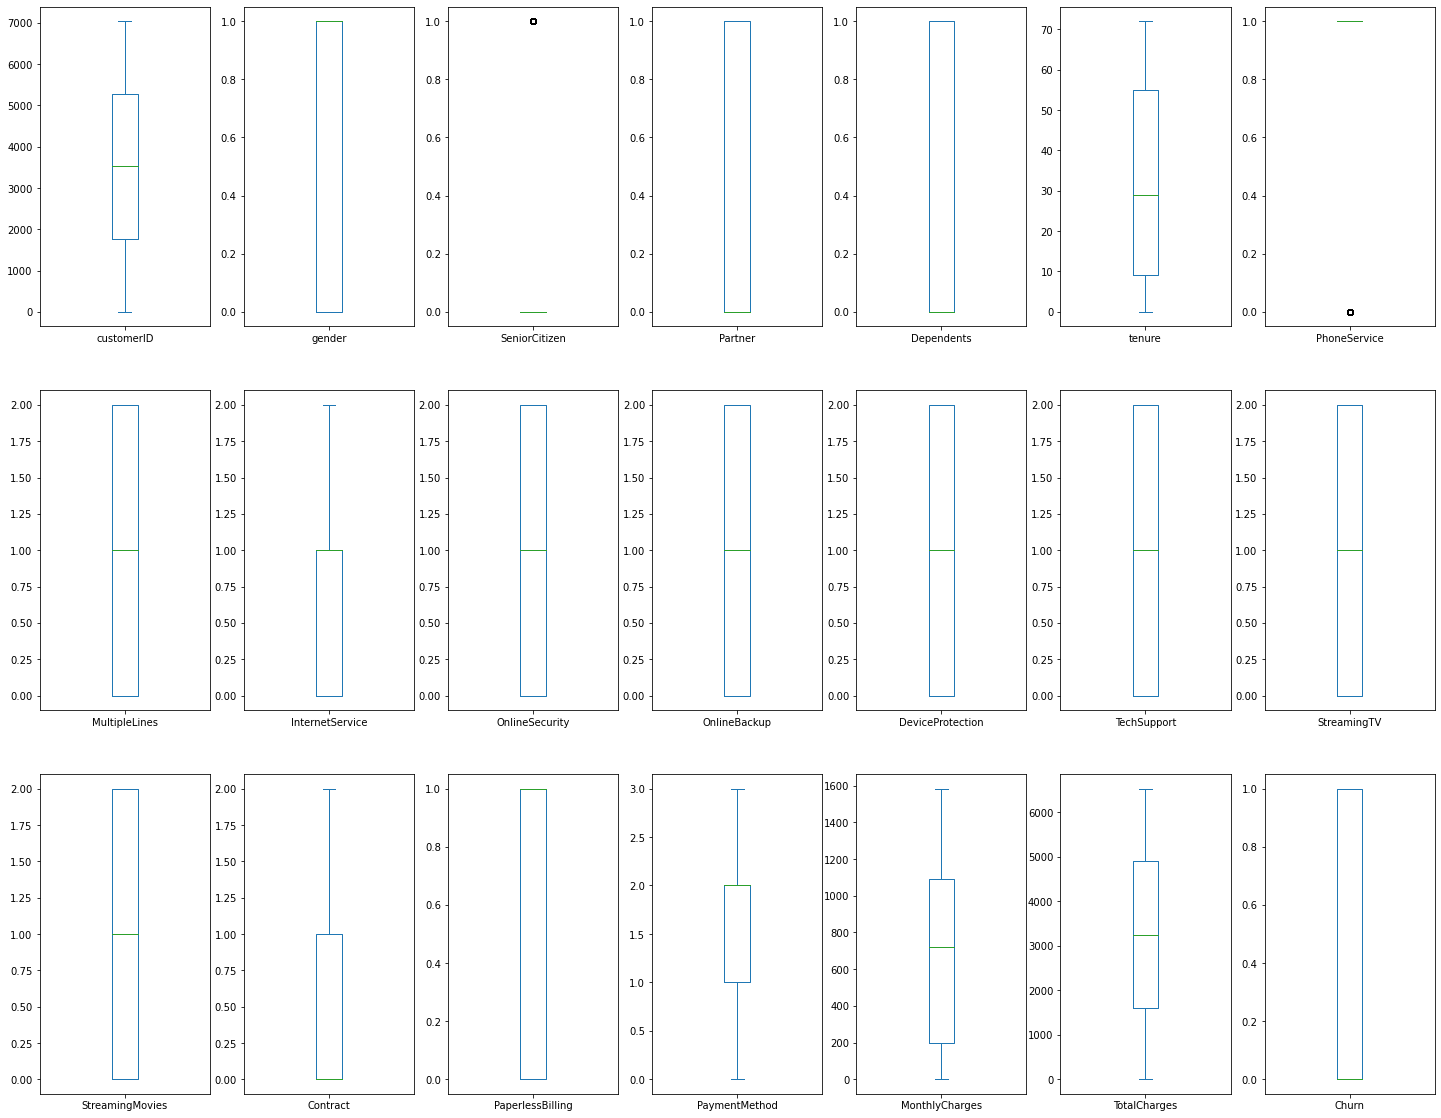

In [31]:
df.plot(kind = 'box', subplots = True, layout = (3,7) ,figsize=(25,20))

# Skewness

In [32]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges      0.014263
TotalCharges        0.015857
Churn               1.063031
dtype: float64

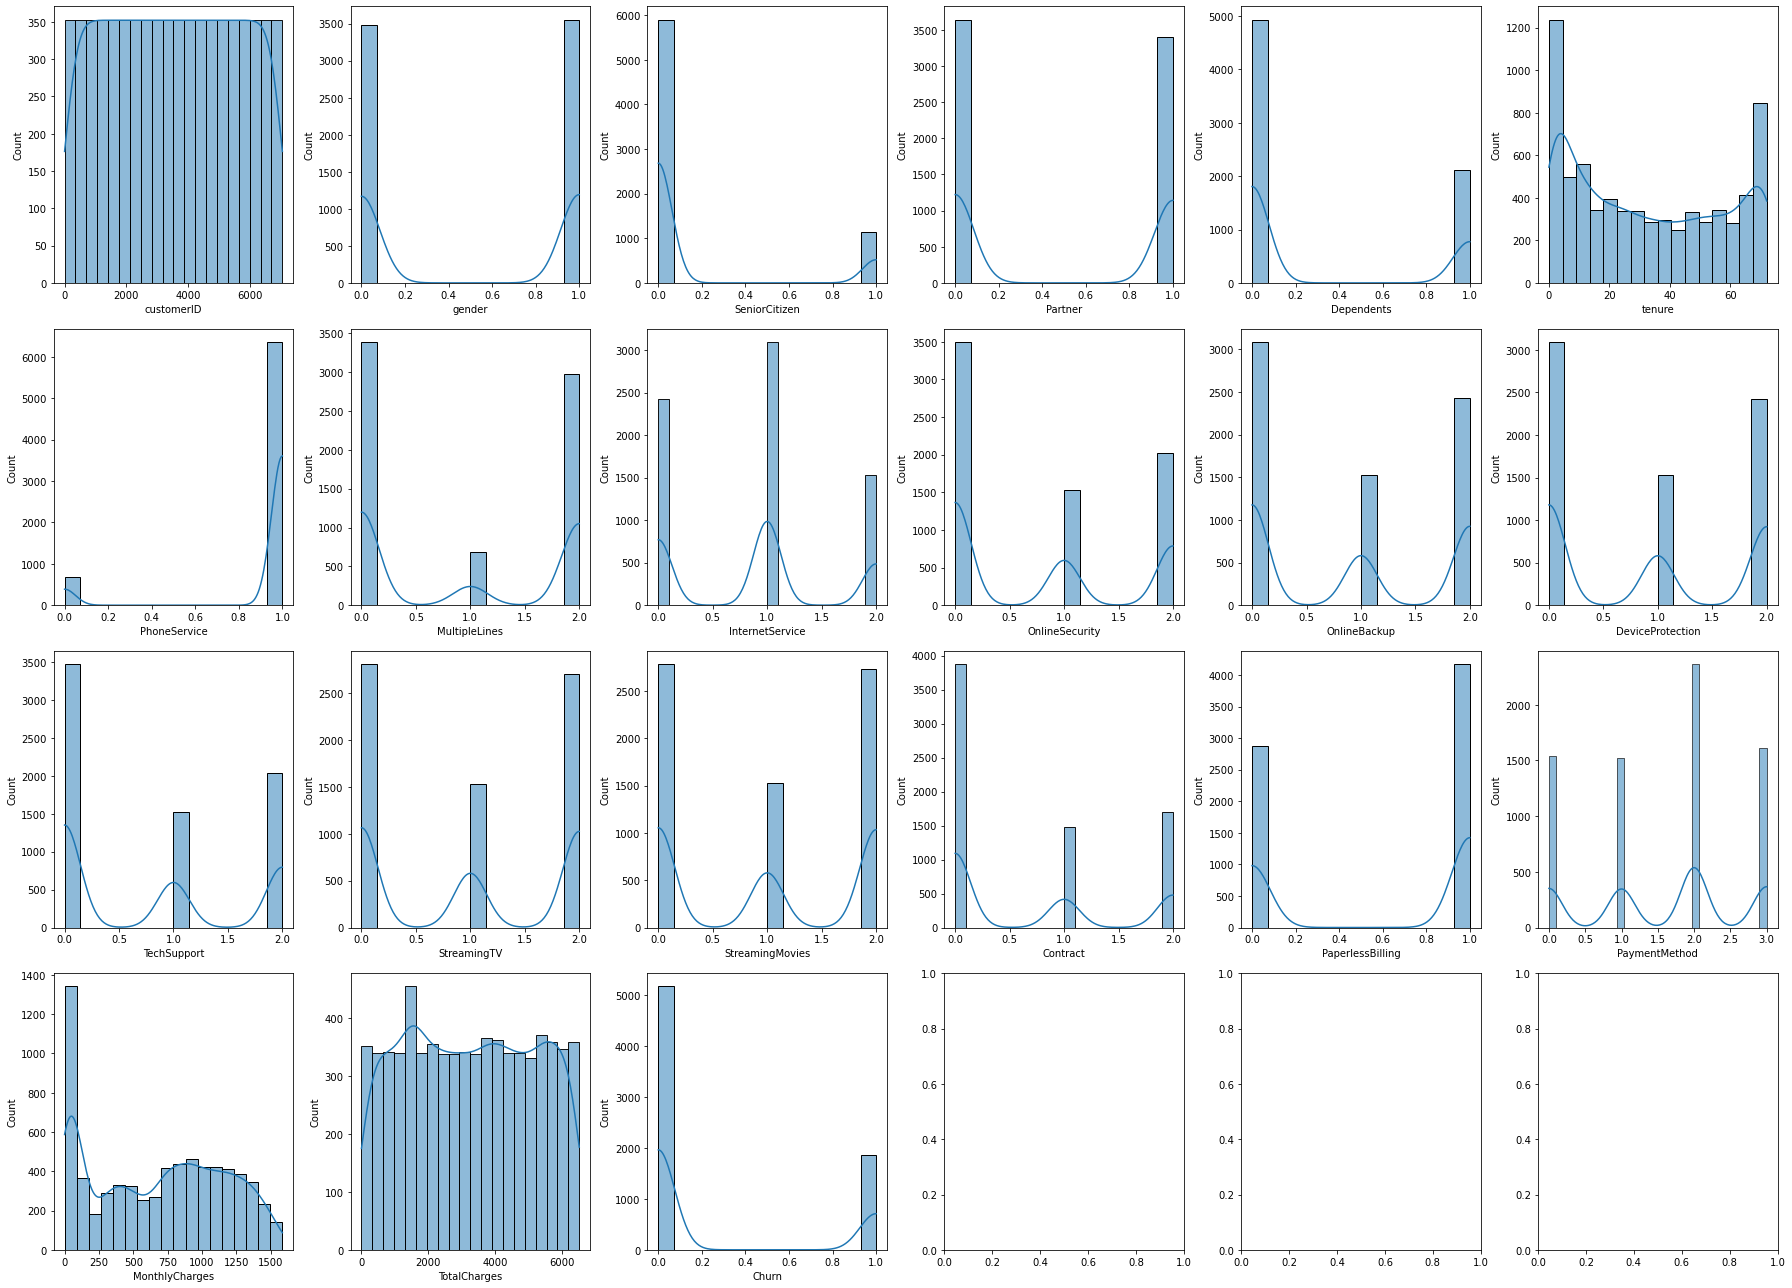

In [33]:
fig, ax = plt.subplots(ncols = 6, nrows = 4, figsize = (25,18))
index=0
ax = ax.flatten()

for col, value in df.items():
    if col!= 'type':
        sns.histplot(data = df, x = col, ax= ax[index], kde = True)
        index +=1
plt.tight_layout()

In [34]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


In [37]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [38]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.06991541, -0.28254766],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.15927767, -0.88438245],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.28943076, -1.93709705],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.08752438, -0.02722738],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.38564885, -0.20008892],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.25632086,  1.08504111]])

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.06991541, -0.28254766],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.15927767, -0.88438245],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.28943076, -1.93709705],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.08752438, -0.02722738],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.38564885, -0.20008892],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.25632086,  1.08504111]])

In [40]:
df1 = pd.DataFrame(df)

# Train test split

In [41]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.model_selection import cross_val_score

In [45]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv = None)
cvs.mean()

[[764 257]
 [207 842]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1021
           1       0.77      0.80      0.78      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

0.7758454106280194


0.7630472374574755

In [46]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X, Y, cv = None)
cvs.mean()

[[762 259]
 [170 879]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1021
           1       0.77      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.80      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

0.7927536231884058


0.7923293710000163

In [47]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv = None)
cvs.mean()

[[716 305]
 [162 887]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.75      1021
           1       0.74      0.85      0.79      1049

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070

0.7743961352657005


0.7648846673811476

In [48]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X, Y, cv = None)
cvs.mean()

[[813 208]
 [ 73 976]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1021
           1       0.82      0.93      0.87      1049

    accuracy                           0.86      2070
   macro avg       0.87      0.86      0.86      2070
weighted avg       0.87      0.86      0.86      2070

0.8642512077294686


0.8793031710341059

In [49]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv = None)
cvs.mean()

[[857 164]
 [ 52 997]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1021
           1       0.86      0.95      0.90      1049

    accuracy                           0.90      2070
   macro avg       0.90      0.89      0.90      2070
weighted avg       0.90      0.90      0.90      2070

0.8956521739130435


0.9044289406770757

# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 10)]
max_features = ['auto', "sqrt", 'log2']
max_depth    = [int(x) for x in np.linspace(35, 900, 10)]
min_samples_split = [2, 4, 10, 15]
min_samples_leaf  = [10, 20, 300, 400]

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "criterion" : ['gini', 'entropy']}
print(random_grid)

{'n_estimators': [10, 108, 207, 306, 405, 504, 603, 702, 801, 900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [35, 131, 227, 323, 419, 515, 611, 707, 803, 900], 'min_samples_split': [2, 4, 10, 15], 'min_samples_leaf': [10, 20, 300, 400], 'criterion': ['gini', 'entropy']}


In [52]:
rf = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator = rf, 
                          param_distributions= random_grid, 
                          cv = 5, 
                          verbose = 2, 
                          random_state=100, 
                          n_jobs = -1)

#fitting
rscv.fit(X_train, Y_train)
rscv

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [35, 131, 227, 323, 419,
                                                      515, 611, 707, 803, 900],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 300, 400],
                                        'min_samples_split': [2, 4, 10, 15],
                                        'n_estimators': [10, 108, 207, 306, 405,
                                                         504, 603, 702, 801,
                                                         900]},
                   random_state=100, verbose=2)

In [53]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=611, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=900)

In [54]:
best_rscv = rscv.best_estimator_
pred = best_rscv.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rscv, X, Y, cv=10)
cvs.mean()

[[801 220]
 [147 902]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1021
           1       0.80      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

0.8227053140096618
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8225782337715731

In [55]:
import pickle
filename = 'Customer Churn Analysis.pkl'
pickle.dump(rf, open(filename, 'wb'))